# Time Series com Python




In [7]:
# importa as bibliotecas que serão usadas
import pandas as pd
from pandas import read_csv
from pandas import concat
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Marcio Rodrigues\AppData\Local\Temp\ipykernel_6568\459817365.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# ler a base de dados usada.
series = read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True).squeeze(1)

*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.

## Decompondo uma série temporal



- **Modelo aditivo**

                      y(t) = Level + Trend + Seasonality + Noise

  - Os componentes se somam.
  - A amplitude da sazonalidade se mantém com um aumento da tendência.



- **Modelo multiplicativo**

                      y(t) = Level × Trend × Seasonality × Noise
                
  - Os componentes se multiplicam.
  - A amplitude da sazonalidade também aumenta com a tendência

Importa a biblioteca Statsmodel

<AxesSubplot:>

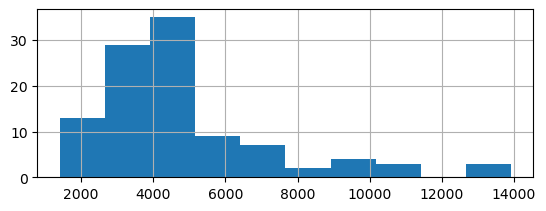

In [4]:
# plota um histogram

pyplot.figure(1)
pyplot.subplot(211)
series.hist()

Visualizando os dados

<AxesSubplot:xlabel='Month'>

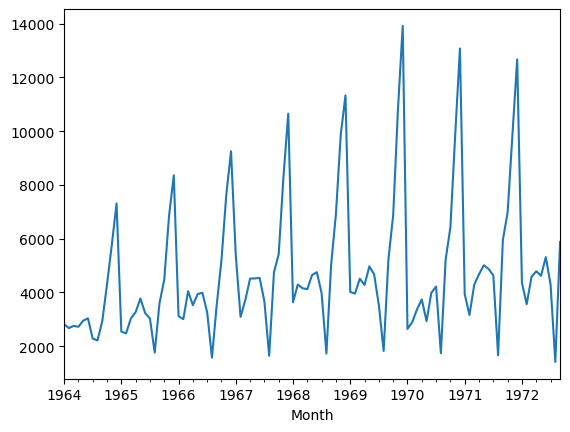

In [5]:
series.plot()

Podemos observar que existe sazonalidade e que a amplitude dos picos aumenta (não é constante) com passar do tempo. Isso indica que o modelo **multiplicativo** se encaixa melhor. mas iremos testar os 2

### Criando um modelo aditivo

In [8]:
resultado = seasonal_decompose(series,  model='additive')

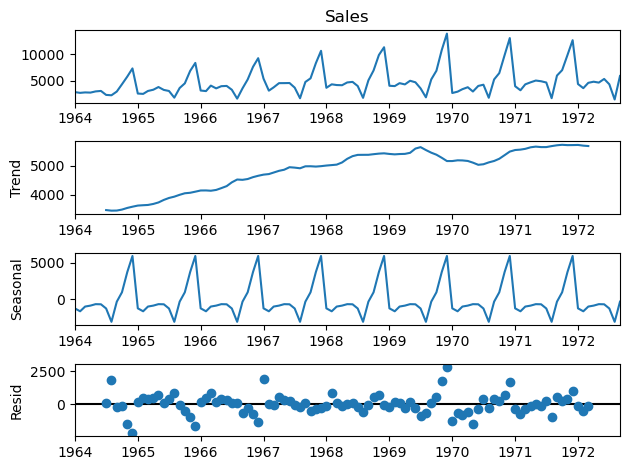

In [9]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

Criando um modelo multiplicativo

In [10]:
resultado = seasonal_decompose(series,  model='multiplicative')

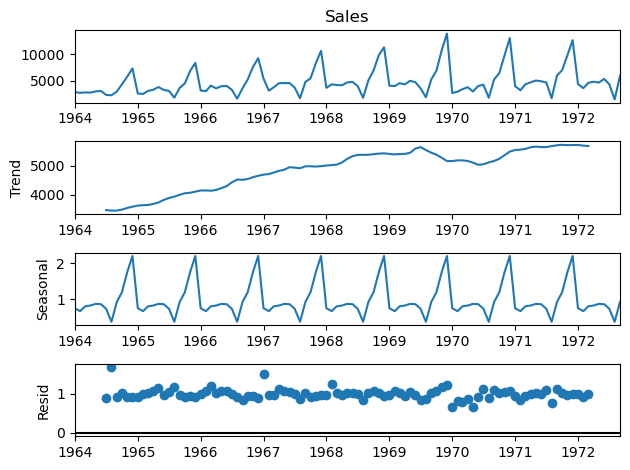

In [11]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

## Removendo tendência e sazonalidade da série temporal

Considerações Gerais:

-      Conveniência: *Remover tendência e sazonalidade de várias séries para treinar um único modelo*.

-      Clareza na informação: *Remover as informações sazonais podem clarear os sinais nos dados. Exemplo: Os preços das ações da APPLE sobem a 5 anos. O modelo levar isso em consideração pode atrapalhar prever se o dia de amanhã será de alta ou não alta*

**Tipos de Sazonalidades, exemplo:**

- Hora do dia.
- Diário.
- Dia da Semana.
- Semanal.
- Mensal.
- Anual.

**Métodos Statísticos**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Tende a melhorar modelos devido a incapacidade de alguns métodos.

**Machine Learning**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Nem sempre melhora os modelos de Machine Learning.

Tendência obvia

<AxesSubplot:xlabel='Month'>

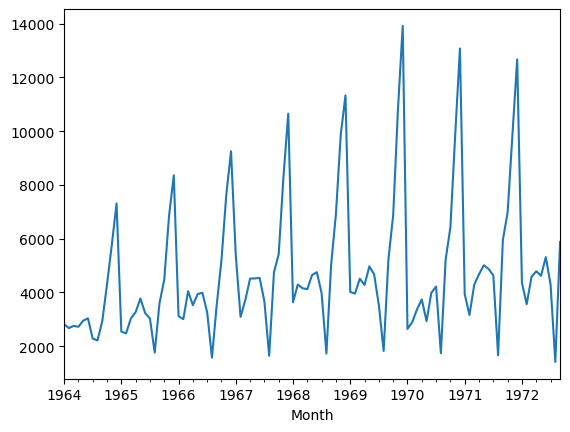

In [12]:
series.plot()

Decompondo a série

In [13]:
resultado = seasonal_decompose(series,  model='multiplicative')

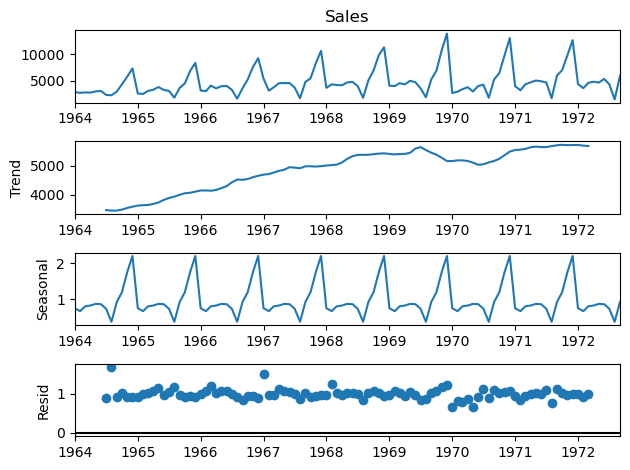

In [14]:
import matplotlib.pyplot as plt
resultado.plot()
plt.show()

## Diferenciação

- *Diferenciação de primeiro nível*
- *Converte níveis para alterações*



                  value(t) = observation(t) − observation(t − 1)

In [16]:
# cria uma lista vazia
diff = list()

In [17]:
# para cada valor da série, subtrair pelo valor anterior
for i in range(1, len(series.values)):
    valor = series.values[i] - series.values[i - 1]
    diff.append(valor)

In [18]:
# imprime os 10 primeiros valores da série
diff[:10]

[-143, 83, -34, 225, 90, -754, -70, 710, 1379, 1463]

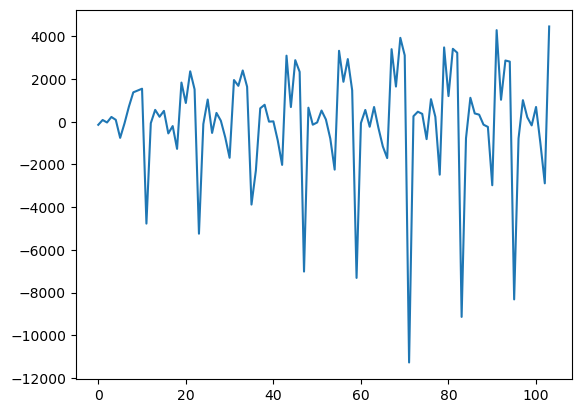

In [19]:
# plota a série após a diferenciação
from matplotlib import pyplot
pyplot.plot(diff)

<AxesSubplot:xlabel='Month'>

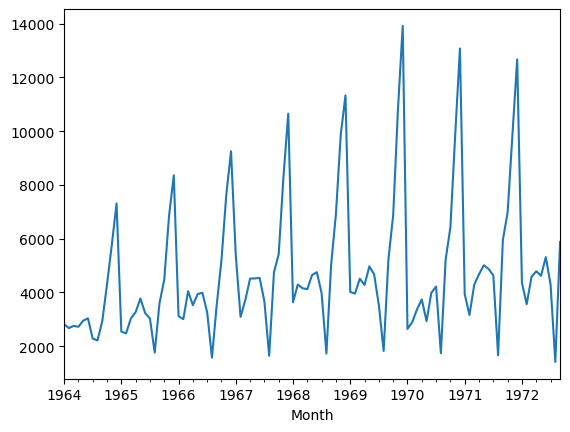

In [20]:
series.plot()

Removendo Sazonalidade

In [21]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [22]:
# cria uma lista chamada diff
diff = list()

# define o número de mês que iremos usar
mes = 1

# intera sobre os valores da série
for i in range(mes, len(series.values)):
  
    # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
    valor = series.values[i] - series.values[i - mes]

    # alimenta a lista diff
    diff.append(valor)  

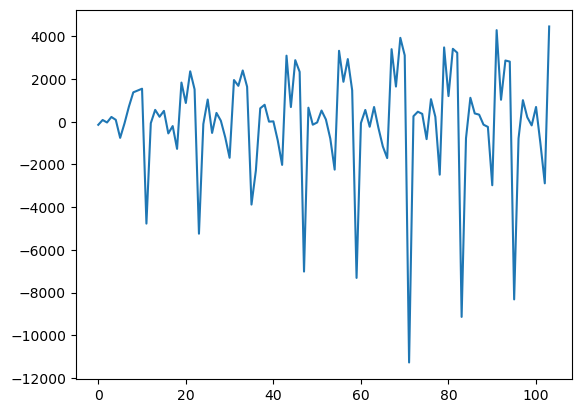

In [23]:

pyplot.plot(diff)
pyplot.show()

## Estacionariedade em Séries temporais

- Séries temporais são diferentes de problemas tradicionais de classificação e regressão. A estrutura temporal adiciona uma ordem as observações.
- Essa ordem imposta significa que suposições importantes sobre a consistência dessas observações precisam ser tratadas especialmente.
- Na terminologia de séries temporais, as séries cuja resumos estatísticos são constantes chamamos de séries estacionárias.

**Verifica estacionariedade de uma série:**

*   Olhe os gráficos.
*   Estatítica descritiva.
*   Testes Estatísticos.



Analisando o histograma da série

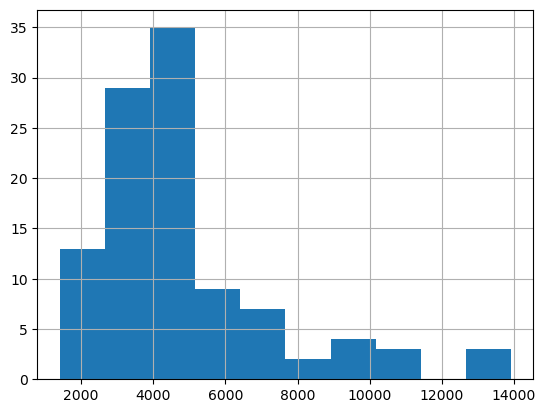

In [24]:
series.hist()
pyplot.show()

In [25]:
# separa os dados em duas partes
split = int(len(series.values) / 2)

In [26]:
print (len(series.values))
print (split)

105
52


In [27]:
# Divide os dados em duas partes e coloca nas variáveis x1 e x2
X1 = series.values[0:split]
X2 = series.values[split:]

In [28]:
# calcula as médias
mean1 =  X1.mean()
mean2 =  X2.mean()

In [29]:
#mean1
mean2

5346.584905660377

In [30]:
# calcula a variância entre as partes
var1, var2 = X1.var(), X2.var()

In [31]:
# imprime média e variância entre as partes
print('media1= %f, \nmedia2= %f' % (mean1, mean2))

media1= 4164.461538, 
media2= 5346.584906


In [32]:
print('variancia1= %f, \nvariancia2= %f' % (var1, var2))

variancia1= 3735104.940828, 
variancia2= 8438014.431470


### Teste Estatístico - Augmented Dickey-Fuller test

- Hipotese Nula (H0): *Falha para rejeitar, sugere que a série não é estacionária. Esta tem estrutura dependente de tempo.*

- Hipotese Alternativa (H1): *A hipotese nula foi rejeitada, sugere que a série temporal é estacionária. Esta não tem estrutura dependente de tempo.*

* **p-value > 0.05**: Falha para rejeitar a hipotese nula (h0) a série é não estacionária.

* **p-value ≤ 0.05**: Rejeita a hipotese nula (H0), a série é estacionária.

In [45]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

In [46]:
resultado = adfuller(series.values)

In [47]:
print('ADF teste: %f' % resultado[0])

ADF teste: -1.833593


In [48]:
print('p-value: %f' % resultado[1])

p-value: 0.363916


In [49]:
print('Critical Values:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


### Transformando a Série Temporal em Estacionária:

Aplicando Log na série

In [50]:
from numpy import log

In [51]:
serie_transformada = log(series.values)

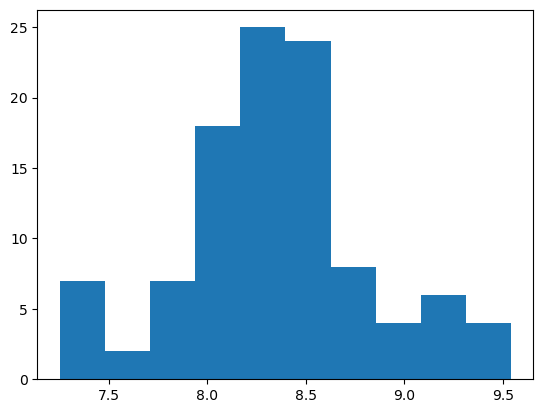

In [52]:
pyplot.hist(serie_transformada)
pyplot.show()

In [53]:
resultado = adfuller(serie_transformada)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))


ADF teste: -2.255119

p-value: 0.186852

Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


Aplicando a diferenciação

In [54]:
# cria uma lista chamada diff
diff = list()
mes = 1
for i in range(mes, len(series.values)):
  # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
  valor = series.values[i] - series.values[i - mes]
  # alimenta a lista diff
  diff.append(valor)

Aplicando o Teste AdFuller

In [56]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(diff)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))


ADF teste: -7.189896

p-value: 0.000000

Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
